In [1]:
import pickle
from scipy.sparse import csr_matrix
from clustering import visualize_silhouette_clusters, compare_true_labels
import numpy as np
from kmodes.kmodes import KModes
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_distances
from soyclustering import SphericalKMeans, visualize_pairwise_distance
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_20newsgroups

with open('data/appliancesreviews/minsupp_0.3/itemset_features.pkl', 'rb') as f:
    itemset_features = pickle.load(f)
    
with open('data/appliances_reviews_labels.pkl', 'rb') as f:
    true_labels = pickle.load(f)
    
print("num of groundtruth labels:", len(np.unique(true_labels)))

num of groundtruth labels: 5


In [2]:
# adjust number of clusters
my_num_clusters = 5

# convert itemset_features to a sparse matrix that SphericalKMeans will accept
itemset_matrix = csr_matrix(itemset_features.astype(int))
density = itemset_matrix.getnnz() / np.prod(itemset_matrix.shape)
print("density of matrix:", density)

spherical_kmeans = SphericalKMeans(
        n_clusters=my_num_clusters,
        max_iter=100,
        verbose=1,
        init='similar_cut',
        #sparsity='minimum_df',
        minimum_df_factor=0.05
    )

sphkmeans_cluster_labels = spherical_kmeans.fit_predict(itemset_matrix)
print('finished spherical clustering')

compare_true_labels(true_labels, sphkmeans_cluster_labels, itemset_features)

density of matrix: 0.3759521095638891
initialization_time=0.001998 sec, sparsity=0.453
n_iter=1, changed=2172, inertia=880.014, iter_time=1.138 sec, sparsity=0.333
n_iter=2, changed=63, inertia=670.875, iter_time=1.134 sec, sparsity=0.33
n_iter=3, changed=79, inertia=657.073, iter_time=1.148 sec, sparsity=0.334
n_iter=4, changed=20, inertia=642.084, iter_time=1.149 sec, sparsity=0.335
n_iter=5, changed=5, inertia=640.997, iter_time=1.129 sec, sparsity=0.335
n_iter=6, changed=2, inertia=640.997, iter_time=1.149 sec, sparsity=0.335
n_iter=7, changed=0, inertia=640.997, iter_time=1.150 sec, sparsity=0.335
Early converged.
finished spherical clustering
Adjusted Rand Index: -0.026272281518352574
Normalized Mutual Information: 0.12575606783370732
Homogeneity: 0.15051027632247982
Completeness: 0.10799438653680181
V-Measure: 0.12575606783370735
Silhouette Score: 0.4234772041435273


In [3]:
%%script false --no-raise-error

# KModes clustering

km = KModes(n_clusters=my_num_clusters, init='Huang', n_init=5, verbose=1, n_jobs=-1)
kmodes_cluster_labels = km.fit_predict(itemset_features)

compare_true_labels(true_labels, kmodes_cluster_labels, itemset_features)


Couldn't find program: 'false'


In [4]:
%%script false --no-raise-error

# Agglomerative clustering

distances = cosine_distances(itemset_features)

agglo_clustering = AgglomerativeClustering(n_clusters=my_num_clusters, metric="precomputed", linkage="average")
agglo_labels = agglo_clustering.fit_predict(distances)

compare_true_labels(true_labels, agglo_labels, itemset_features)



Couldn't find program: 'false'


In [5]:
## RANDOM VISUALIZATION STUFF BELOW

For n_clusters = 5 The average silhouette_score is : 0.4234772041435273


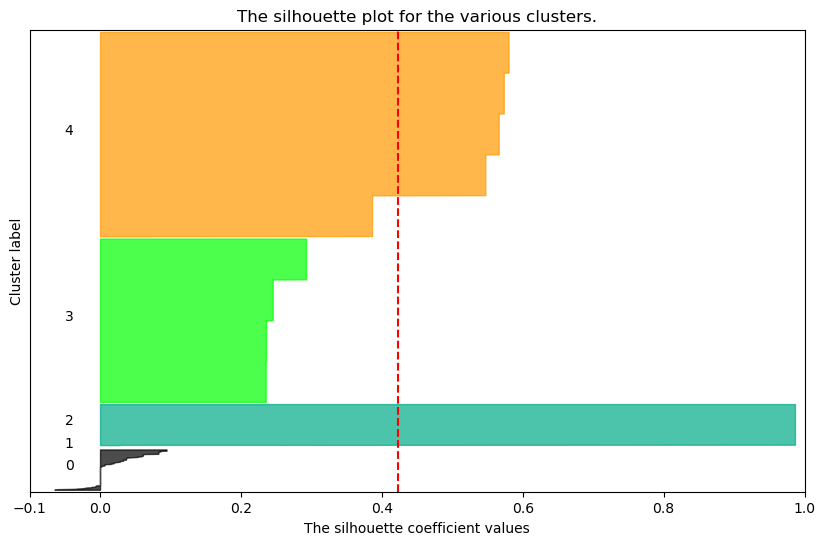

In [6]:
## Silhouette plot to visualize how good clusters are: if they are good, should see more on the right side
## Good average silhouette score apparently should be >0.5?

visualize_silhouette_clusters(sphkmeans_cluster_labels, itemset_features, metric='cosine')

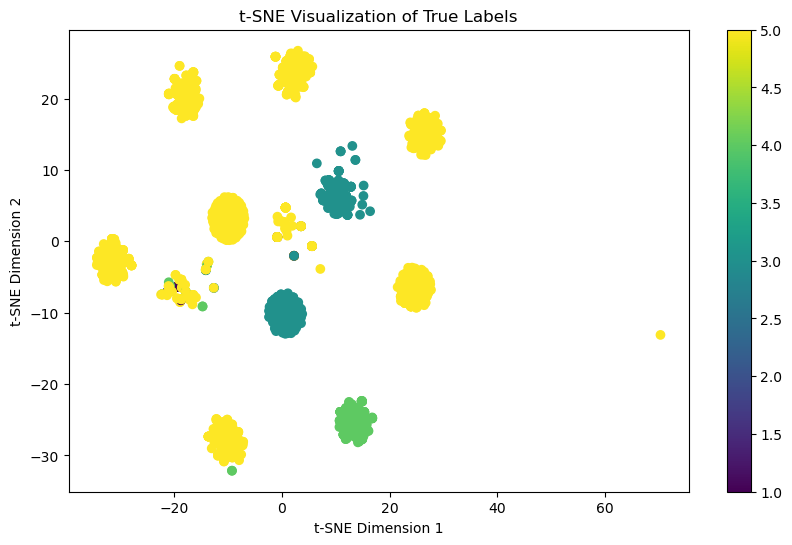

In [7]:
## using t-sne (alternative to pca) to visualize TRUE LABELS

# Calculate cosine distances between binary vectors
cosine_distances_matrix = cosine_distances(itemset_features)

# Create a t-SNE instance with cosine distance
tsne = TSNE(n_components=2, metric="precomputed", perplexity=30, learning_rate=200, init="random")

# Fit t-SNE to the cosine distance matrix
tsne_results = tsne.fit_transform(cosine_distances_matrix)

# Create a scatter plot to visualize the results
plt.figure(figsize=(10, 6))


plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=true_labels, cmap='viridis')
plt.colorbar()
plt.title('t-SNE Visualization of True Labels')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


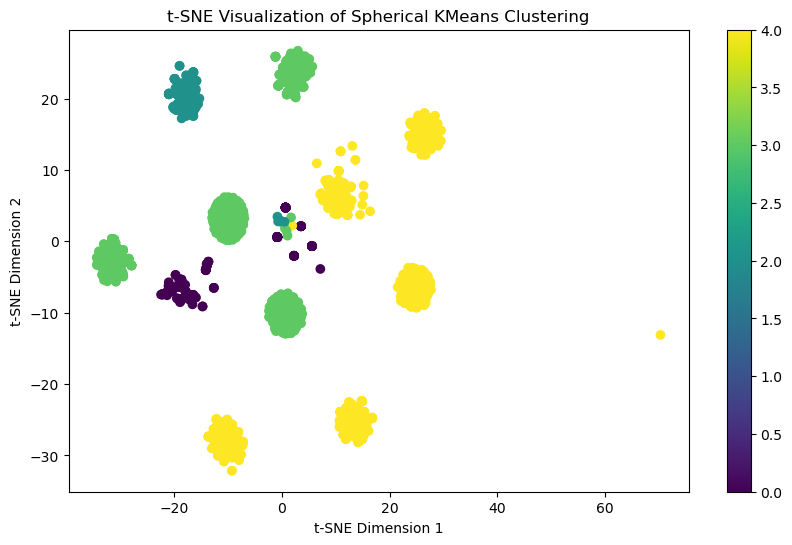

In [8]:
## using t-sne (alternative to pca) to visualize SPHKMEANS clusters

# Create a scatter plot to visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=sphkmeans_cluster_labels, cmap='viridis')
plt.colorbar()
plt.title('t-SNE Visualization of Spherical KMeans Clustering')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


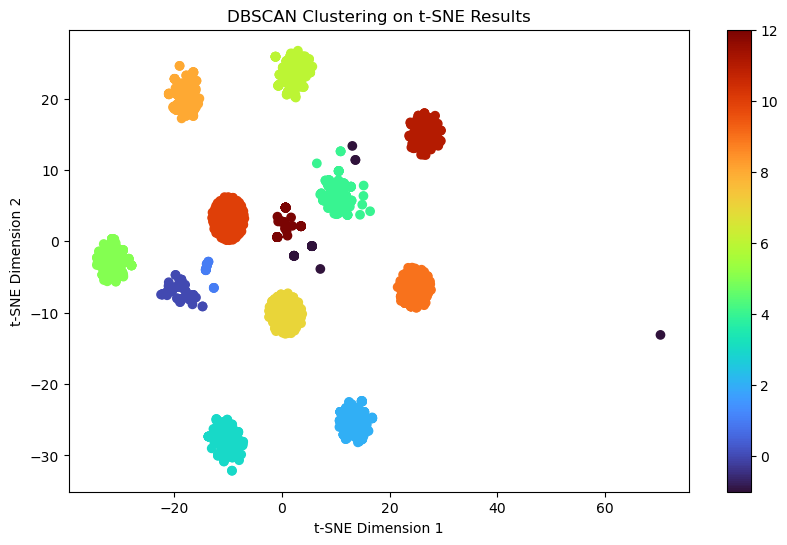

Adjusted Rand Index: 0.13888509847290298
Normalized Mutual Information: 0.45417270515624775
Homogeneity: 0.3025755392558139
Completeness: 0.9102068602531178
V-Measure: 0.4541727051562477
Silhouette Score: 0.0054026732620274425


In [9]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN to the t-SNE results
dbscan = DBSCAN(eps=3, min_samples=20)
dbscan_labels = dbscan.fit_predict(tsne_results)

# Create a scatter plot to visualize the DBSCAN clustering results
plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=dbscan_labels, cmap='turbo')
plt.colorbar()
plt.title('DBSCAN Clustering on t-SNE Results')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

compare_true_labels(dbscan_labels, true_labels, itemset_features)


In [10]:
## SPH KMEANS MORE IDEA

In [11]:
# adjust number of clusters
increased_num_clusters = 3

# convert itemset_features to a sparse matrix that SphericalKMeans will accept
itemset_matrix = csr_matrix(itemset_features.astype(int))
density = itemset_matrix.getnnz() / np.prod(itemset_matrix.shape)
print("density of matrix:", density)

spherical_kmeans = SphericalKMeans(
        n_clusters=increased_num_clusters,
        max_iter=100,
        verbose=1,
        init='similar_cut',
        #sparsity='minimum_df',
        minimum_df_factor=0.05
    )

increased_sphkmeans_cluster_labels = spherical_kmeans.fit_predict(itemset_matrix)
print('finished spherical clustering')

compare_true_labels(true_labels, increased_sphkmeans_cluster_labels, itemset_features)

density of matrix: 0.3759521095638891
initialization_time=0.001999 sec, sparsity=0.0561
n_iter=1, changed=2065, inertia=1774.759, iter_time=1.155 sec, sparsity=0.342
n_iter=2, changed=19, inertia=959.942, iter_time=1.138 sec, sparsity=0.345
n_iter=3, changed=207, inertia=958.345, iter_time=1.132 sec, sparsity=0.356
n_iter=4, changed=46, inertia=825.715, iter_time=1.145 sec, sparsity=0.357
n_iter=5, changed=37, inertia=814.797, iter_time=1.124 sec, sparsity=0.357
n_iter=6, changed=11, inertia=810.381, iter_time=1.132 sec, sparsity=0.358
n_iter=7, changed=5, inertia=809.735, iter_time=1.140 sec, sparsity=0.358
n_iter=8, changed=0, inertia=809.482, iter_time=1.134 sec, sparsity=0.358
Early converged.
finished spherical clustering
Adjusted Rand Index: -0.07998672215180304
Normalized Mutual Information: 0.08851944235952423
Homogeneity: 0.07482793054923054
Completeness: 0.10834338716207048
V-Measure: 0.08851944235952423
Silhouette Score: 0.3714162979415024


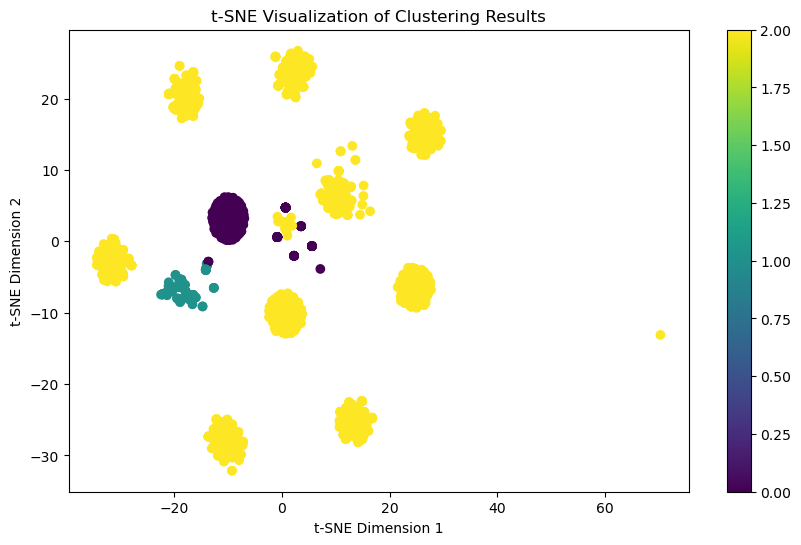

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=increased_sphkmeans_cluster_labels, cmap='viridis')
plt.colorbar()
plt.title('t-SNE Visualization of Clustering Results')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

initialization_time=0.001003 sec, sparsity=0.00864
n_iter=1, changed=2168, inertia=2002.399, iter_time=1.158 sec, sparsity=0.501
n_iter=2, changed=30, inertia=995.073, iter_time=1.154 sec, sparsity=0.506
n_iter=3, changed=70, inertia=977.785, iter_time=1.161 sec, sparsity=0.517
n_iter=4, changed=210, inertia=965.874, iter_time=1.162 sec, sparsity=0.533
n_iter=5, changed=18, inertia=840.106, iter_time=1.150 sec, sparsity=0.529
n_iter=6, changed=2, inertia=840.142, iter_time=1.158 sec, sparsity=0.529
n_iter=7, changed=0, inertia=840.156, iter_time=1.194 sec, sparsity=0.529
Early converged.
initialization_time=0.001999 sec, sparsity=0.0
n_iter=1, changed=1, inertia=391.000, iter_time=0.012 sec, sparsity=0.0293
Early converged.
Adjusted Rand Index: -0.08199898851966529
Normalized Mutual Information: 0.07087620981220073
Homogeneity: 0.05504695796499009
Completeness: 0.0994836294232229
V-Measure: 0.07087620981220073
Silhouette Score: 0.3535051116600673
[0 1 2]


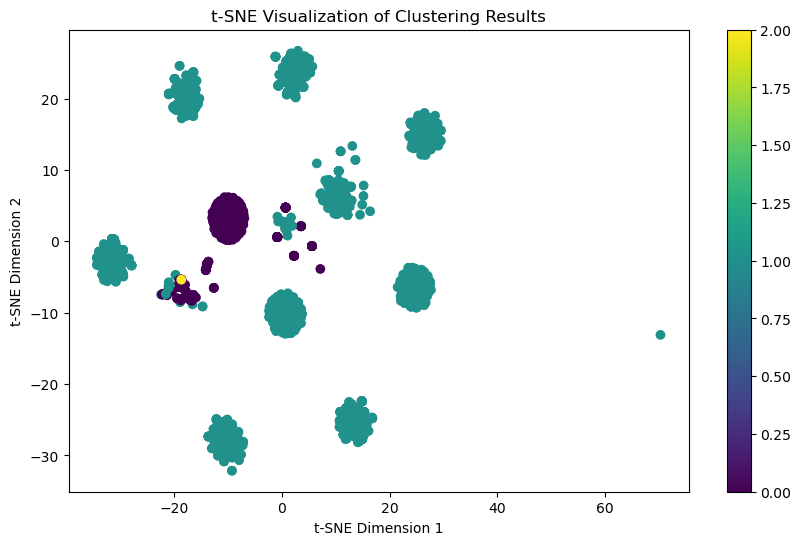

In [37]:
# BISECTING SPHERICAL K MEANS

from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
from sklearn.cluster import KMeans
import numpy as np

# Function to compute intra-cluster variance
def intra_cluster_variance(cluster_data):
    if len(cluster_data) < 2:
        return 0
    centroid = np.mean(cluster_data, axis=0)
    variance = np.mean(np.square(cosine_similarity(cluster_data, centroid.reshape(1, -1)) - 1))
    return variance

# Initialization
n_clusters = increased_num_clusters
clusters = [csr_matrix(itemset_features)]
final_labels = np.zeros(len(itemset_features), dtype=int)

# Bisecting step
while len(clusters) < n_clusters:
    highest_variance = 0
    cluster_to_split = None
    cluster_index = -1

    # Find the cluster with the highest intra-cluster variance
    for i, cluster in enumerate(clusters):
        variance = intra_cluster_variance(cluster.toarray())
        if variance > highest_variance:
            highest_variance = variance
            cluster_to_split = cluster
            cluster_index = i

    # Perform spherical k-means on the cluster with the highest variance
    spherical_kmeans = SphericalKMeans(
        n_clusters=2,
        max_iter=100,
        verbose=1,
        init='similar_cut',
        minimum_df_factor=0.05
    )

    sub_cluster_labels = spherical_kmeans.fit_predict(cluster_to_split)

    # Replace the original cluster with the two new sub-clusters
    clusters.pop(cluster_index)
    for new_cluster_index in [0, 1]:
        new_cluster_data = cluster_to_split.toarray()[sub_cluster_labels == new_cluster_index, :]
        clusters.append(csr_matrix(new_cluster_data))

    # Update labels
    original_indices = np.where(final_labels == cluster_index)[0]
    final_labels[original_indices[sub_cluster_labels == 1]] = len(clusters) - 1
    final_labels[original_indices[sub_cluster_labels == 0]] = cluster_index

# At this point, `labels` contains the cluster assignments for each data point

compare_true_labels(true_labels, final_labels, itemset_features)
print(np.unique(final_labels))

plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=final_labels, cmap='viridis')
plt.colorbar()
plt.title('t-SNE Visualization of Clustering Results')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [16]:
# KModes clustering

km = KModes(n_clusters=increased_num_clusters, init='Huang', n_init=5, verbose=1, n_jobs=-1)
kmodes_cluster_labels = km.fit_predict(itemset_features)

compare_true_labels(true_labels, kmodes_cluster_labels, itemset_features)

Best run was number 1
Adjusted Rand Index: 0.13851857158832856
Normalized Mutual Information: 0.21414481565548693
Homogeneity: 0.23442249056778103
Completeness: 0.19709591053275033
V-Measure: 0.21414481565548693
Silhouette Score: 0.2300142221772315


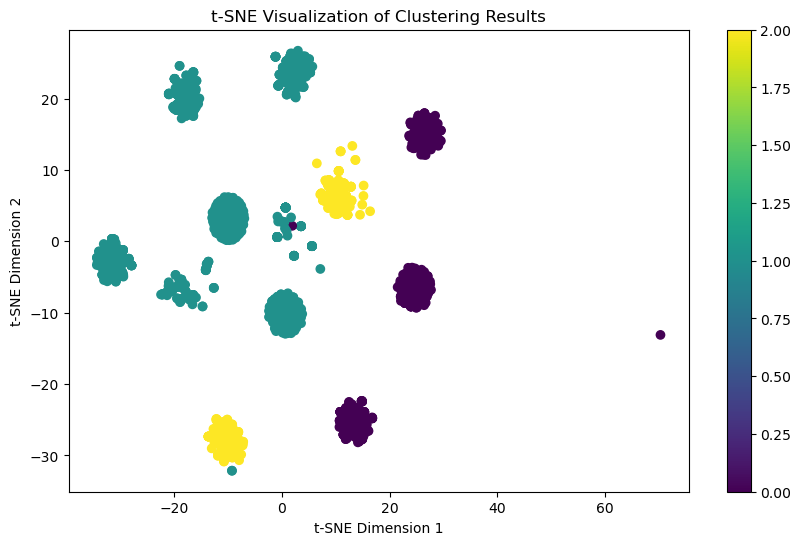

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=kmodes_cluster_labels, cmap='viridis')
plt.colorbar()
plt.title('t-SNE Visualization of Clustering Results')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [18]:
from sklearn.cluster import BisectingKMeans

distances = cosine_distances(itemset_features)

bisecting_clustering = BisectingKMeans(n_clusters=increased_num_clusters, m
agglo_clustering = AgglomerativeClustering(n_clusters=increased_num_clusters, metric="precomputed", linkage="average")
agglo_labels = agglo_clustering.fit_predict(distances)

compare_true_labels(true_labels, agglo_labels, itemset_features)

Adjusted Rand Index: -0.024855274368074207
Normalized Mutual Information: 0.02955618523703147
Homogeneity: 0.01786950266704511
Completeness: 0.08542288512843242
V-Measure: 0.029556185237031466
Silhouette Score: 0.33356092534934134


In [ ]:
## REMOVE OUTLIERS IDEA

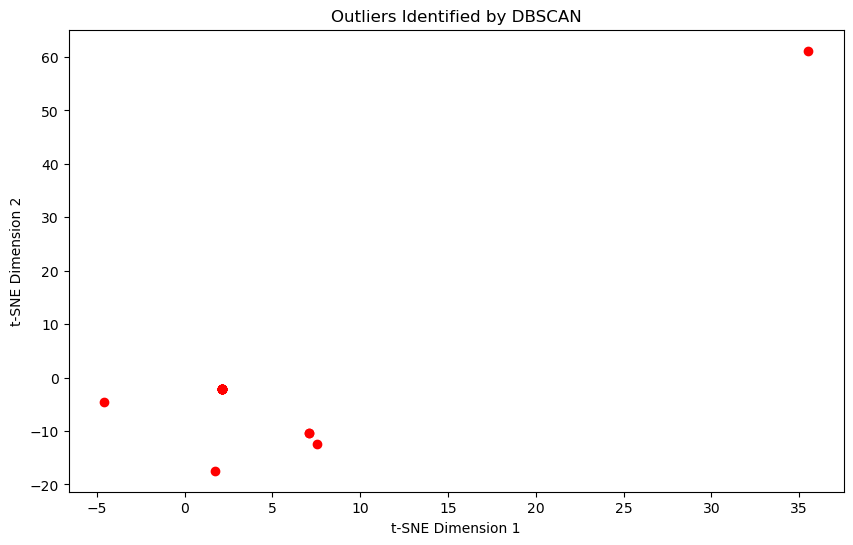

In [14]:
# Filter out the outlier points
outlier_points = tsne_results[dbscan_labels == -1]

# Create a scatter plot for the outliers
plt.figure(figsize=(10, 6))
plt.scatter(outlier_points[:, 0], outlier_points[:, 1], color='red')
plt.title('Outliers Identified by DBSCAN')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [25]:
outlier_index = np.where(dbscan_labels==-1)

filtered_data = np.delete(itemset_features, outlier_index, axis=0)
filtered_labels = np.delete(true_labels, outlier_index, axis=0)
print(len(filtered_labels), len(true_labels))

# convert itemset_features to a sparse matrix that SphericalKMeans will accept
filtered_itemset_matrix = csr_matrix(filtered_data.astype(int))

spherical_kmeans = SphericalKMeans(
        n_clusters=11,
        max_iter=100,
        verbose=0,
        init='similar_cut',
        #sparsity='minimum_df',
        minimum_df_factor=0.05
    )

for i in range(10):
    try:

        filtered_sphkmeans_cluster_labels = spherical_kmeans.fit_predict(filtered_itemset_matrix)
        print('\nRun #' + str(i+1))

        compare_true_labels(filtered_labels, filtered_sphkmeans_cluster_labels, filtered_data)
    except:
        continue

2250 2269

Run #1
Adjusted Rand Index: 0.1622920013230303
Normalized Mutual Information: 0.42768307046043336
Homogeneity: 0.702006878291207
Completeness: 0.3075151293098005
V-Measure: 0.42768307046043336
Silhouette Score: 0.5334123181882076

Run #2
Adjusted Rand Index: 0.14709921777239887
Normalized Mutual Information: 0.3389859187140748
Homogeneity: 0.4832838088023509
Completeness: 0.2610439504786346
V-Measure: 0.3389859187140748
Silhouette Score: 0.2988239663297525

Run #3
Adjusted Rand Index: 0.28321535452288155
Normalized Mutual Information: 0.4480199789126034
Homogeneity: 0.6844493613577063
Completeness: 0.33299388275150354
V-Measure: 0.4480199789126034
Silhouette Score: 0.34437293387167733

Run #4
Adjusted Rand Index: 0.054481833643580384
Normalized Mutual Information: 0.2173469918209028
Homogeneity: 0.3010357204123972
Completeness: 0.17006771582018965
V-Measure: 0.2173469918209028
Silhouette Score: 0.36736367132178116

Run #5
Adjusted Rand Index: -0.03160962600955377
Normalized 

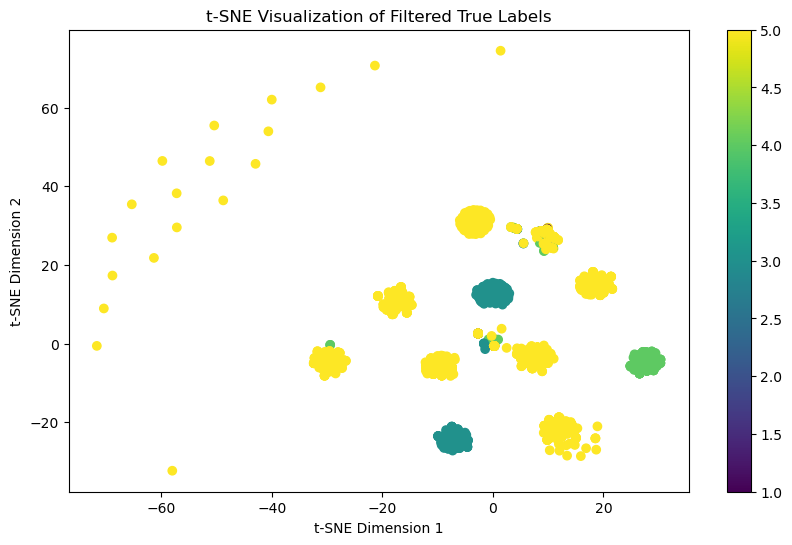

In [16]:
## using t-sne (alternative to pca) to visualize filtered true clusters

# Calculate cosine distances between binary vectors
cosine_distances_matrix = cosine_distances(filtered_data)

# Create a t-SNE instance with cosine distance
tsne = TSNE(n_components=2, metric="precomputed", perplexity=30, learning_rate=200, init="random")

# Fit t-SNE to the cosine distance matrix
tsne_results = tsne.fit_transform(cosine_distances_matrix)

# Create a scatter plot to visualize the results
plt.figure(figsize=(10, 6))


plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=filtered_labels, cmap='viridis')
plt.colorbar()
plt.title('t-SNE Visualization of Filtered True Labels')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


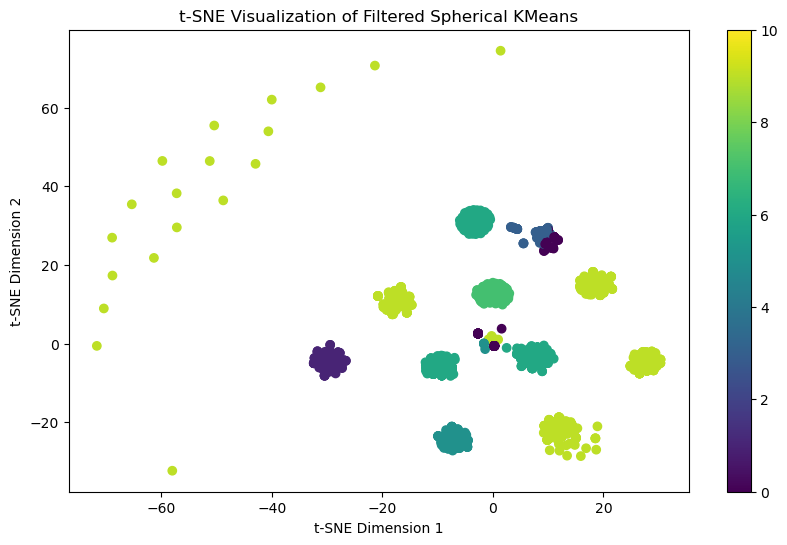

In [17]:
## using t-sne (alternative to pca) to visualize filtered SPHKMEANS clusters

# Create a scatter plot to visualize the results
plt.figure(figsize=(10, 6))

plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=filtered_sphkmeans_cluster_labels, cmap='viridis')
plt.colorbar()
plt.title('t-SNE Visualization of Filtered Spherical KMeans')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [ ]:
## PCA IDEA

2269


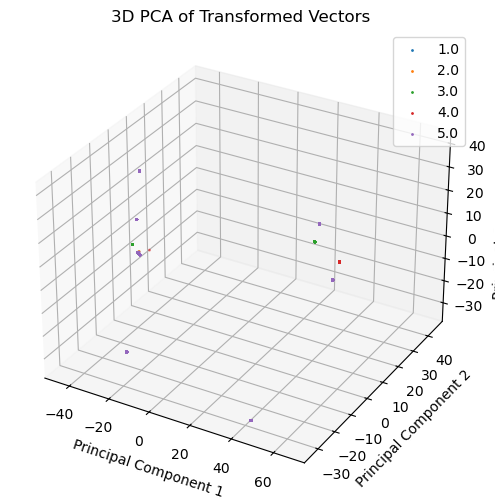

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Normalizing the data
scaler = StandardScaler()
normalized_features = scaler.fit_transform(itemset_features)
print(len(normalized_features))

# Performing PCA
pca_3d = PCA(n_components=3)
pca_features_3d = pca_3d.fit_transform(normalized_features)

# Plotting the PCA transformed vectors in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for label in np.unique(true_labels):
    indices = np.where(true_labels == label)
    ax.scatter(pca_features_3d[indices, 0], pca_features_3d[indices, 1], pca_features_3d[indices, 2], label=label, s=1)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of Transformed Vectors')
ax.legend()

plt.show()

In [22]:
print(sum(pca_3d.explained_variance_ratio_))

0.6636059094217612


In [ ]:
# function included with the sphericalkmeans library to evaluate the distance between the clusters
# dark means closer, light means further away - think ideally should have more light squares?

sphkmeans_centers = spherical_kmeans.cluster_centers_

fig = visualize_pairwise_distance(centers=sphkmeans_centers,
                                  labels=sphkmeans_cluster_labels, 
                                  max_dist=1, 
                                  sort=False)

In [ ]:
# extra

#agglomerative clustering

# from sklearn.metrics.pairwise import cosine_similarity
# Compute the cosine similarity matrix
# similarity = cosine_similarity(itemset_features)
# print(similarity.__sizeof__()/1024)


np.set_printoptions(threshold=3000)

print(true_labels)
print(sphkmeans_cluster_labels)

from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(true_labels, sphkmeans_cluster_labels)
